In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

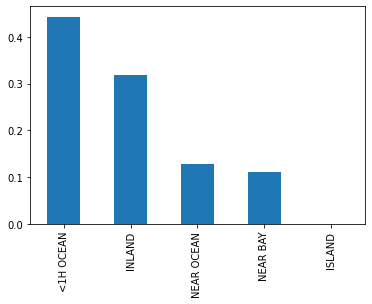

In [4]:
data.ocean_proximity.value_counts(normalize=True).plot(kind='bar')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

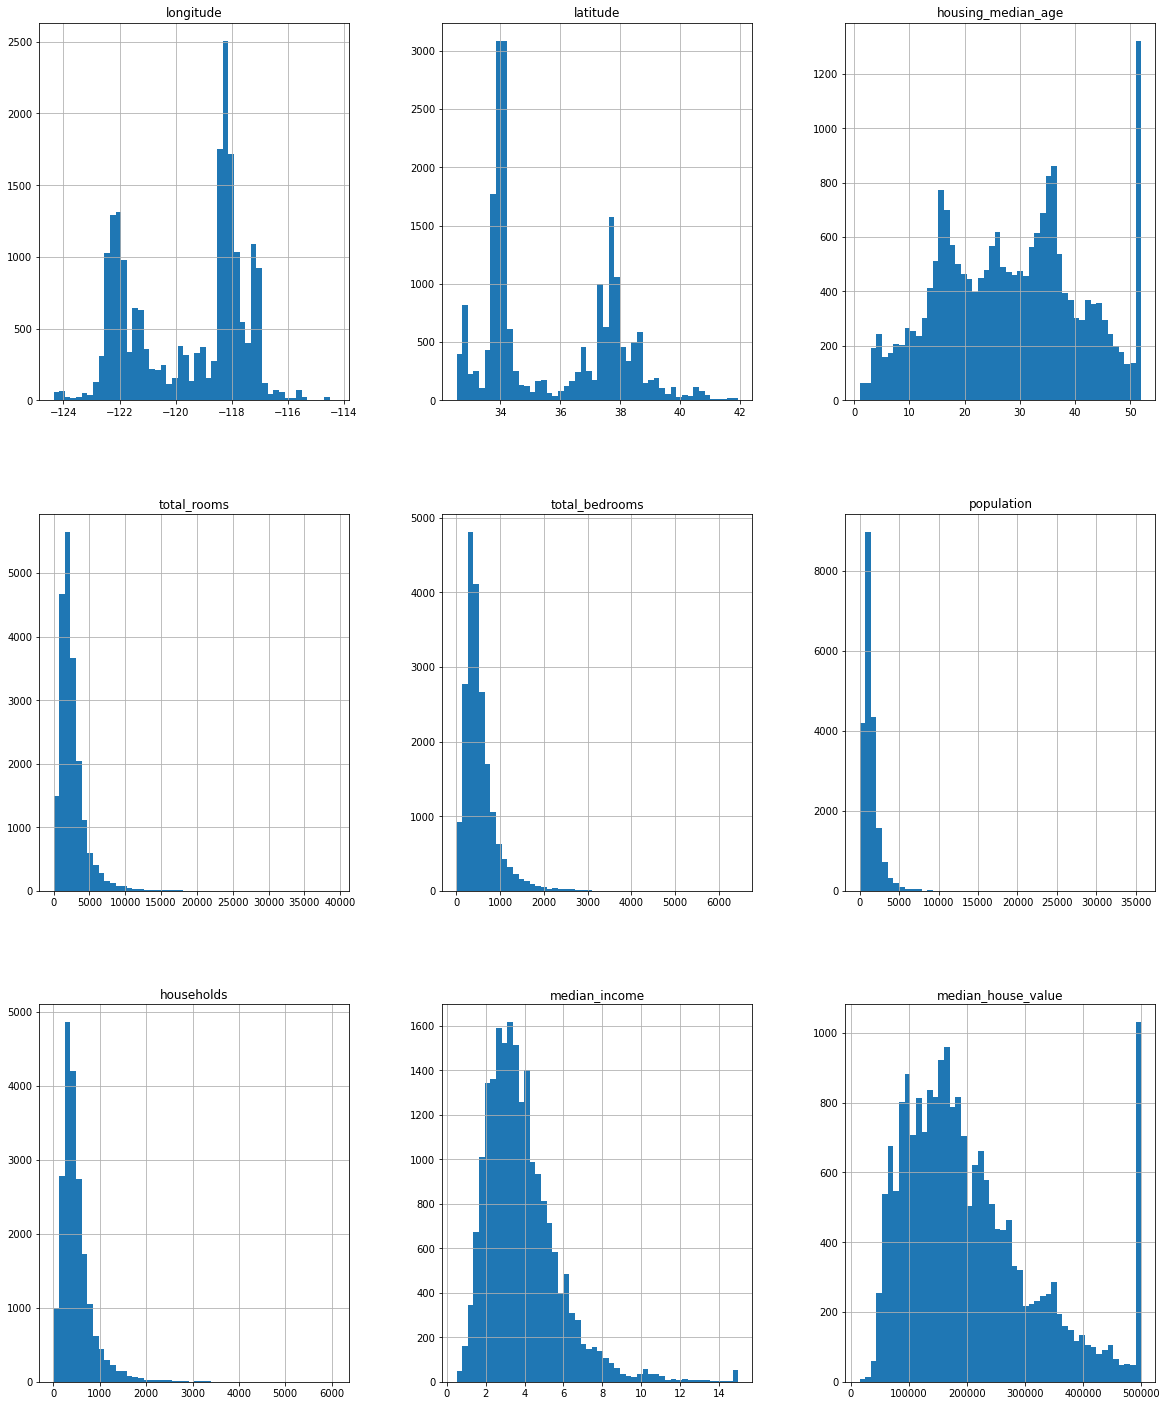

In [6]:
data.hist(bins=50,figsize=(20,25))

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ocean_proximity']=le.fit_transform(data['ocean_proximity'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [8]:
data=data.sample(frac=1).reset_index(drop=False)
data.tail()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,13048,-121.31,38.59,35.0,3295.0,560.0,1454.0,536.0,3.1711,101900.0,1
20636,6988,-118.03,33.97,36.0,2149.0,527.0,1359.0,481.0,2.8240,167900.0,0
20637,3854,-118.43,34.18,25.0,3830.0,1105.0,2328.0,1017.0,2.6238,210000.0,0
20638,17315,-120.18,34.62,25.0,1337.0,219.0,671.0,225.0,3.1912,226400.0,4
20639,15950,-122.44,37.72,49.0,1557.0,405.0,1173.0,385.0,3.4605,265000.0,3


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=data.iloc[:,data.columns!='median_house_value']
y=data['median_house_value']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

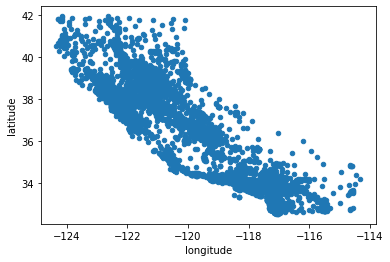

In [12]:
data.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

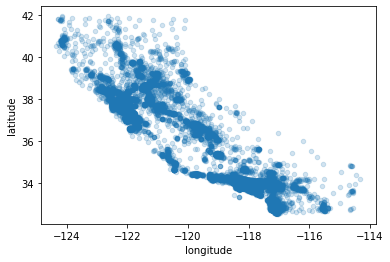

In [13]:
#setting alpha makes it much easier to visualize the places where there is a high density of data points
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2)

In [14]:
#Looking for Correlations
corr_matrix=data.corr()
corr_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
index,1.000000,-0.113254,0.081062,-0.181132,0.061896,0.032098,0.024880,0.030186,0.071673,0.072086,0.127522
longitude,-0.113254,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,0.081062,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.181132,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.061896,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.032098,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.024880,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.030186,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,0.071673,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,0.072086,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750


In [15]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
index                 0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

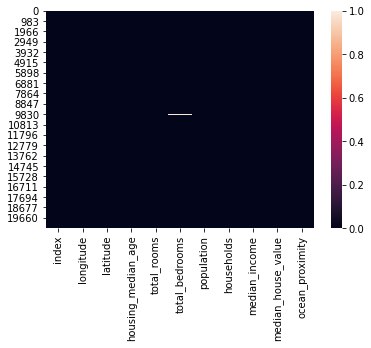

In [18]:
sns.heatmap(data.isnull())

In [19]:
data.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

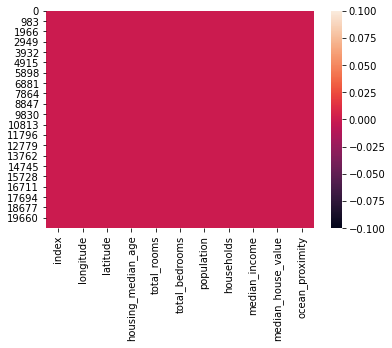

In [21]:
median=data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median,inplace=True)
sns.heatmap(data.isnull())

In [25]:
from sklearn.preprocessing import StandardScaler
ssl=StandardScaler()
X=data.iloc[:,data.columns!='median_house_value']
Y=data['median_house_value']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [28]:
x_train=ssl.fit_transform(x_train)

In [29]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [30]:
l=linreg.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error
lmse=mean_squared_error(l,y_test)
lrmse=np.sqrt(lmse)
lrmse

63041575.31560961

In [32]:
print(l)

[ 17410054.41883065 -29124376.76621049  -6642458.56311568 ...
 -23481707.66491868 -34591013.60727215 -71646989.57228455]


In [33]:
y_test

12794    153300.0
14259    308100.0
17616    500001.0
1815     348700.0
12854    208300.0
           ...   
19186     72700.0
4473     223000.0
2572     222900.0
3560     207200.0
8027     288100.0
Name: median_house_value, Length: 5160, dtype: float64

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
rand=reg.predict(x_test)

In [36]:
rf=mean_squared_error(rand,y_test)
rfmse=np.sqrt(rf)
rfmse

207440.01903972906

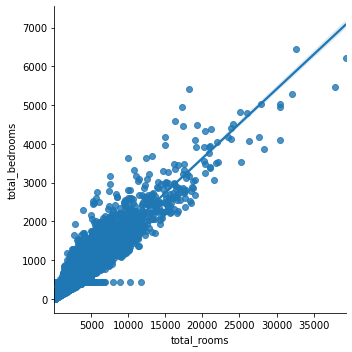

In [38]:
from sklearn.model_selection import GridSearchCV
sns.lmplot(data=data,x='total_rooms',y='total_bedrooms')

In [ ]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

In [ ]:
final_model=grid_search.best_estimator_
k=final_model.predict(x_test)
final_mse=mean_squared_error(k,y_test)
final_rmse=np.sqr